In [7]:
from stable_baselines3 import PPO
from torchinfo import summary

In [8]:
model = PPO.load("../.scratch/logs/default/0/last_model.zip")

In [9]:
input_size = (1, 6, 224, 224)  # Batch size 1 pre detailný prehľad
summary(model.policy, input_size=input_size, depth=2) 

Layer (type:depth-idx)                             Output Shape              Param #
CustomSharedCnnPolicy                              [1]                       --
├─CustomCnnNetwork: 1-1                            [1, 384]                  --
│    └─Normalize: 2-1                              [1, 6, 224, 224]          --
│    └─Eva: 2-2                                    [1, 257, 384]             21,846,912
├─Sequential: 1-2                                  [1, 19]                   --
│    └─Linear: 2-3                                 [1, 512]                  197,120
│    └─ReLU: 2-4                                   [1, 512]                  --
│    └─Linear: 2-5                                 [1, 256]                  131,328
│    └─ReLU: 2-6                                   [1, 256]                  --
│    └─Linear: 2-7                                 [1, 19]                   4,883
├─Sequential: 1-3                                  [1, 1]                    --
│    └─Linear:

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Načítanie numpy array zo súboru
frames = np.load("../observation.npy")  # Nahraď názvom súboru

print("Shape:", frames.shape)  # Overenie rozmerov


Shape: (6, 224, 224)


In [20]:
frames = frames.transpose(0, 2, 1)  # Premiestni kanálovú dimenziu na začiatok
print("New shape:", frames.shape) 

New shape: (6, 224, 224)


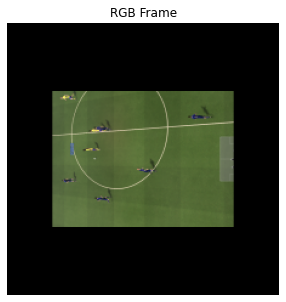

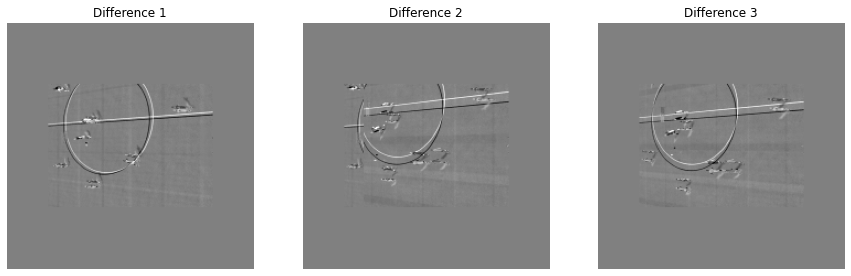

In [21]:
# Zobrazenie RGB obrázka
#rgb = frames[:3].transpose(1, 2, 0)  # Preusporiadanie späť na (224, 224, 3)

rgb = frames[:3].transpose(1, 2, 0).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(rgb)
plt.axis("off")
plt.title("RGB Frame")
plt.show()

# Zobrazenie grayscale rozdielov
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(frames[3 + i], cmap="gray")  # Zobrazenie grayscale kanálov
    axes[i].axis("off")
    axes[i].set_title(f"Difference {i+1}")

plt.show()

In [10]:
print("Min:", frames.min(), "Max:", frames.max())

Min: 0 Max: 255
